<a href="https://colab.research.google.com/github/rohitnikam1/Basic_Financial_Analysis/blob/master/5_Instability_of_Estimates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instability of Parameter Estimates**
## **Parameters**
A parameter is anything that a model uses to constrain its predictions. Commonly, a parameter is a quantity that helps to describe a data set or a distribution. For example, the mean of a normal distribution is a parameter; in fact, we say that a normal distribution is parametrized by its mean and variance. If we take the mean of a set of samples drawn from the normal distribution, we get an estimate of the mean of the distribution. Similarly, the mean of a set of observations is an estimate of the parameter of the underlying distribution (which is often assumed to be normal). Other parameters include the median, the correlation coefficient to another series, the standard deviation, and every other measurement of a data set.
## **You Never Know, You Only Estimate**
When you take the mean of a data set, you do not know the mean. You have estimated the mean as best you can from the data you have. The estimate can be off. This is true of any parameter you estimate. **To actually understand what is going on you need to determine how good your estimate is by looking at its stability/standard error/confidence intervals.**
## **Instability of estimates**
Whenever we consider a set of observations, our calculation of a parameter can only be an estimate. It will change as we take more measurements or as time passes and we get new observations. We can quantify the uncertainty in our estimate by looking at how the parameter changes as we look at different subsets of the data. For instance, standard deviation describes how different the mean of a set is from the mean of each observation, that is, from each observation itself. In financial applications, data often comes in time series. In this case, we can estimate a parameter at different points in time; say, for the previous 30 days. By looking at how much this moving estimate fluctuates as we change our time window, we can compute the instability of the estimated parameter.

In [68]:
# Importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

## **Example: Mean and Standard Deviation**
First, let's take a look at some samples from a normal distribution. We know that the mean of the distribution is 0 and the standard deviation is 1; but if we measure the parameters from our observations, we will get only approximately 0 and approximately 1. We can see how these estimates change as we take more and more samples:

In [2]:
# Set a seed so we can play with the data without generating new random numbers every time
np.random.seed(123)

In [6]:
np.random.randn(20)

array([ 0.5536264 ,  0.55387447, -0.69120045,  0.37558231,  0.26127255,
       -0.12845175,  2.1581702 , -0.84087862,  0.01430509, -0.38238703,
       -0.37178001,  0.159412  , -0.2943957 , -0.86042676,  0.1242275 ,
        1.18233165,  0.94276638,  0.20304449, -0.73539681,  0.1864296 ])

Mean of first 10 observations: -0.07697372167944024
Mean of first 100 observations: 0.013596095647631666
Mean of first 250 observations: 0.027778832477746106
Mean of all 500 observations: 0.015123987971860344


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


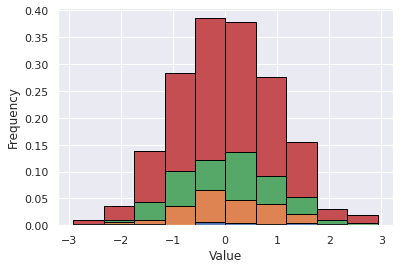

In [69]:
normal = np.random.randn(500)
print(f'Mean of first 10 observations: {np.mean(normal[:10])}')
print(f'Mean of first 100 observations: {np.mean(normal[:100])}')
print(f'Mean of first 250 observations: {np.mean(normal[:250])}')
print(f'Mean of all 500 observations: {np.mean(normal)}')

# Plot a stacked histogram of the data
plt.hist([normal[:10], normal[10:100], normal[100:250], normal],  density=1, histtype='bar', ec='black', stacked=True);
plt.ylabel('Frequency')
plt.xlabel('Value');

In [19]:
print(f'Std of first 10 observations: {np.std(normal[:10])}')
print(f'Std of first 100 observations: {np.std(normal[:100])}')
print(f'Std of first 250 observations: {np.std(normal[:250])}')
print(f'Std of all 500 observations: {np.std(normal)}')

Std of first 10 observations: 0.5733196474654441
Std of first 100 observations: 0.8937672973495595
Std of first 250 observations: 1.0387298399287808
Std of all 500 observations: 1.018299052232278


Notice that, although the probability of getting closer to 0 and 1 for the mean and standard deviation, respectively, increases with the number of samples, we do not always get better estimates by taking more data points. Whatever our expectation is, we can always get a different result, and our goal is often to compute the probability that the result is significantly different than expected.

With time-series data, we usually care only about contiguous subsets of the data. The moving average (also called running or rolling) assigns the mean of the previous $n$ data points to each point in time. 

## **Example: Non-Normal Underlying Distribution**
What happens if the underlying data isn't normal? A mean will be very deceptive. Because of this it's important to test for normality of your data. We'll use a **Jarque-Bera test** as an example.

mean: 0.3127896436925295
standard deviation: 5.097695278214015


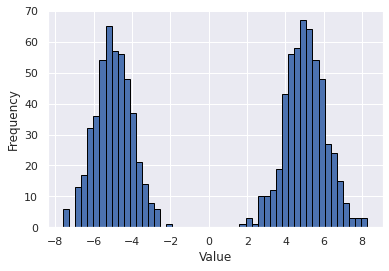

In [70]:
# Generate some data from a bi-modal distribution
def bimodal(n):
    X = np.zeros((n))
    for i in range(n):
        if np.random.binomial(1, 0.5) == 0:
            X[i] = np.random.normal(-5, 1)
        else:
            X[i] =  np.random.normal(5, 1)
    return X
            
X = bimodal(1000)

#Let's see how it looks
plt.hist(X, bins=50, ec='black')
plt.ylabel('Frequency')
plt.xlabel('Value')
print(f'mean: {np.mean(X)}')
print(f'standard deviation: {np.std(X)}')

Sure enough, the mean is incredibly non-informative about what is going on in the data. We have collapsed all of our data into a single estimate, and lost of a lot of information doing so. This is what the distribution should look like if our hypothesis that it is normally distributed is correct.

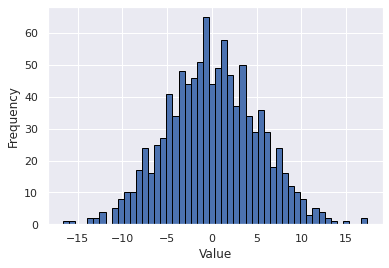

In [71]:
mu = np.mean(X)
sigma = np.std(X)

N = np.random.normal(mu, sigma, 1000)

plt.hist(N, bins=50, ec='black')
plt.ylabel('Frequency')
plt.xlabel('Value');

We'll test our data using the **Jarque-Bera test** to see if it's normal. A significant p-value indicates non-normality.

In [53]:
from statsmodels.stats.stattools import jarque_bera

test_statistic, p_value, skewness, kurtosis = jarque_bera(X)
print(p_value)

8.977007144974787e-32


Sure enough the p-value is $\lt 0.05$ and we say that $X$ is not normal. This saves us from accidentally making horrible predictions.

##**Example: Sharpe ratio**
One statistic often used to describe the performance of assets and portfolios is the Sharpe ratio, which measures the additional return per unit additional risk achieved by a portfolio, relative to a risk-free source of return such as Treasury bills: $$R = \frac{E[r_a - r_b]}{\sqrt{Var(r_a - r_b)}}$$

where $r_a$ is the returns on our asset and $r_b$ is the risk-free rate of return. As with mean and standard deviation, we can compute a rolling Sharpe ratio to see how our estimate changes through time.


In [55]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 30.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=cb11f2756caa9659938ae0ff0a3efd2e21eb564339bd5417ca0094a77932da31
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [59]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [79]:
def get_data(tickers, start, end):
  '''Get stock data for tickers'''
  stockData = pdr.get_data_yahoo(tickers, start=start, end=end)
  stockData = stockData['Close']
  return stockData

In [80]:
def get_returns(stockData):
  '''Get stock returns for tickers'''
  returns = stockData.pct_change()
  return returns[1:]

In [61]:
def sharpe_ratio(asset, riskfree):
    return np.mean(asset - riskfree)/np.std(asset - riskfree)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


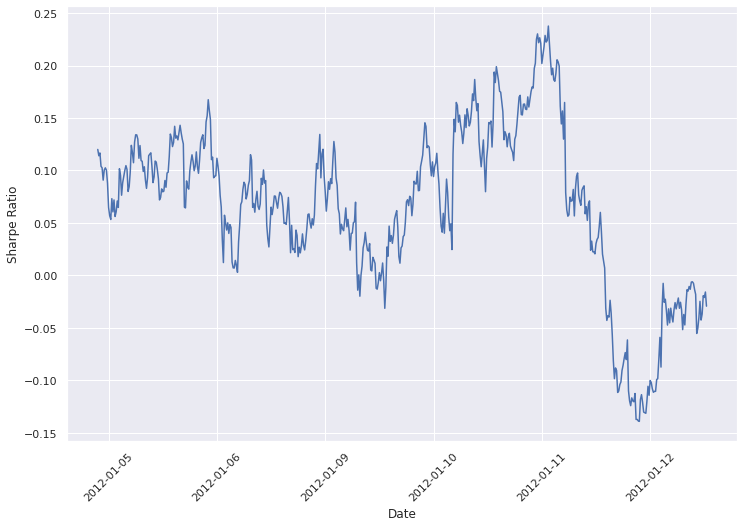

In [90]:
start = '2012-01-01'
end   = '2015-01-01'

# Use an ETF that tracks 3-month treasury bills as our risk-free rate of return
treasury_ret = get_returns(get_data(['BIL'], start=start, end=end))
returns      = get_returns(get_data(['AMZN'], start=start, end=end)) # Get the returns on the asset

# Compute the running Sharpe ratio
running_sharpe = [sharpe_ratio(returns[i-90:i], treasury_ret[i-90:i]) for i in range(90, len(returns))]

# Plot running Sharpe ratio up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(returns)-100), running_sharpe[:-100]);
ax1.set_xticklabels(returns.index.date)
ax1.tick_params(axis = 'x', rotation = 45)
# ticks = ax1.get_xticks()
# ax1.set_xticklabels([returns.index[i].date() for i in ticks[:-1]]) # Label x-axis with dates
ax1.set_xlabel('Date')
ax1.set_ylabel('Sharpe Ratio');

The Sharpe ratio looks rather volatile, and it's clear that just reporting it as a single value will not be very helpful for predicting future values. Instead, we can compute the mean and standard deviation of the data above, and then see if it helps us predict the Sharpe ratio for the next 100 days.

Mean of running Sharpe ratio:  0.06539968368979569
std of running Sharpe ratio: 0.07816847490993364


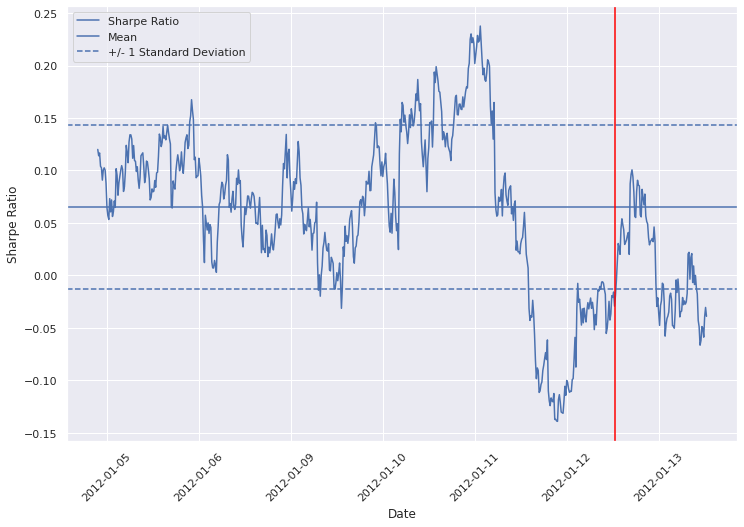

In [89]:
# Compute the mean and std of the running Sharpe ratios up to 100 days before the end
mean_rs = np.mean(running_sharpe[:-100])
std_rs = np.std(running_sharpe[:-100])

# Plot running Sharpe ratio
_, ax2 = plt.subplots(figsize=(12,8))
ax2.plot(range(90, len(returns)), running_sharpe)
ax2.set_xticklabels(returns.index.date) # Label x-axis with dates
ax2.tick_params(axis = 'x', rotation = 45)

# Plot its mean and the +/- 1 standard deviation lines
ax2.axhline(mean_rs)
ax2.axhline(mean_rs + std_rs, linestyle='--')
ax2.axhline(mean_rs - std_rs, linestyle='--')

# Indicate where we computed the mean and standard deviations
# Everything after this is 'out of sample' which we are comparing with the estimated mean and std
ax2.axvline(len(returns) - 100, color='red');
ax2.set_xlabel('Date')
ax2.set_ylabel('Sharpe Ratio')
ax2.legend(['Sharpe Ratio', 'Mean', '+/- 1 Standard Deviation'])

print(f'Mean of running Sharpe ratio:  {mean_rs}')
print(f'std of running Sharpe ratio: {std_rs}')

The standard deviation in this case is about a quarter of the range, so this data is extremely volatile. Taking this into account when looking ahead gave a better prediction than just using the mean, although we still observed data more than one standard deviation away. We could also compute the rolling mean of the Sharpe ratio to try and follow trends; but in that case, too, we should keep in mind the standard deviation.

# **Example: Moving Average**
Let's say you take the average with a lookback window; how would you determine the standard error on that estimate? Let's start with an example showing a 90-day moving average.

[*********************100%***********************]  1 of 1 completed


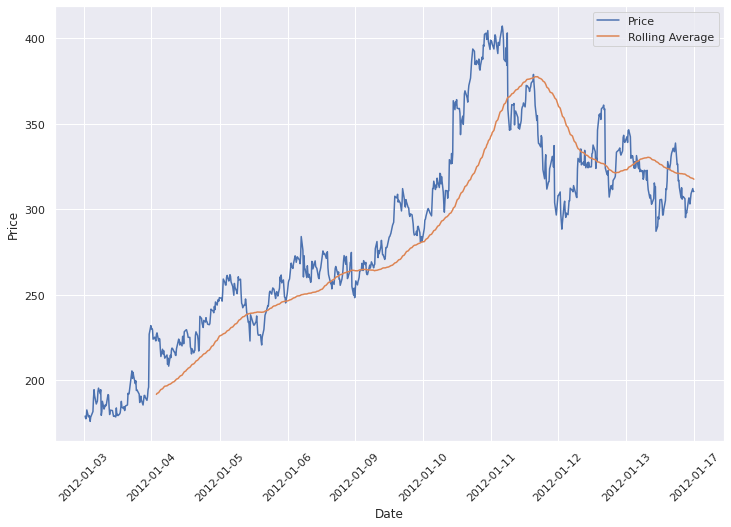

In [88]:
# Load time series of prices
start = '2012-01-01'
end = '2015-01-01'
pricing = get_data(['AMZN'], start=start, end=end)

# Compute the rolling mean for each day
mu = pricing.rolling(window=90).mean()

# Plot pricing data
_, ax3 = plt.subplots(figsize=(12,8))
ax3.plot(pricing) 
ax3.set_xticklabels(pricing.index.date) # Label x-axis with dates
ax3.tick_params(axis = 'x', rotation = 45)
ax3.set_ylabel('Price')
ax3.set_xlabel('Date')

# Plot rolling mean
ax3.plot(mu);
ax3.legend(['Price','Rolling Average']);

This lets us see the instability/standard error of the mean, and helps anticipate future variability in the data. We can quantify this variability by computing the mean and standard deviation of the rolling mean.

In [87]:
print(f'Mean of rolling mean: {np.mean(mu)}')
print(f'std of rolling mean: {np.std(mu)}')

Mean of rolling mean: 288.38633955239277
std of rolling mean: 51.1351502493079


In fact, the standard deviation, which we use to quantify variability, is itself variable. Below we plot the rolling standard deviation (for a 90-day window), and compute its mean and standard deviation.

Mean of rolling std: 17.403827723705366
std of rolling std: 7.5446920824802834


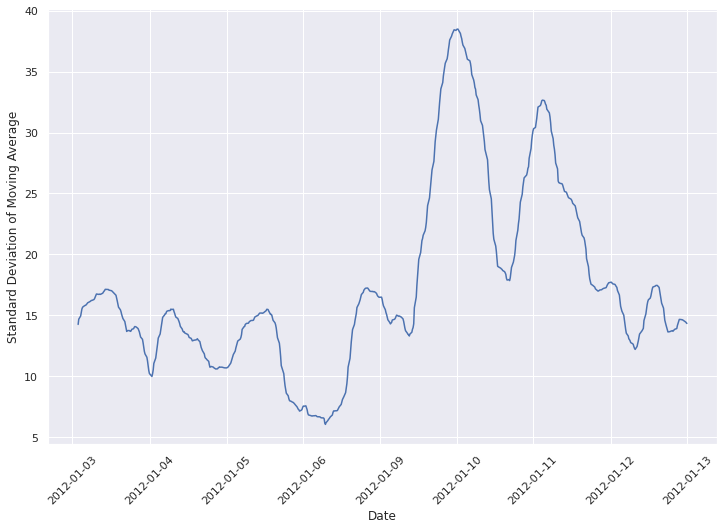

In [91]:
# Compute rolling standard deviation
std = pricing.rolling(window=90).std()

# Plot rolling std
_, ax4 = plt.subplots(figsize=(12,8))
ax4.plot(std)
ax4.set_xticklabels(pricing.index.date) # Label x-axis with dates
ax4.tick_params(axis = 'x', rotation = 45)
ax4.set_ylabel('Standard Deviation of Moving Average')
ax4.set_xlabel('Date')

print(f'Mean of rolling std: {np.mean(std)}')
print(f'std of rolling std: {np.std(std)}')

To see what this changing standard deviation means for our data set, let's plot the data again along with the Bollinger bands: the rolling mean, one rolling standard deviation (of the data) above the mean, and one standard deviation below.

Note that although standard deviations give us more information about the spread of the data, we cannot assign precise probabilities to our expectations for future observations without assuming a particular distribution for the underlying process.

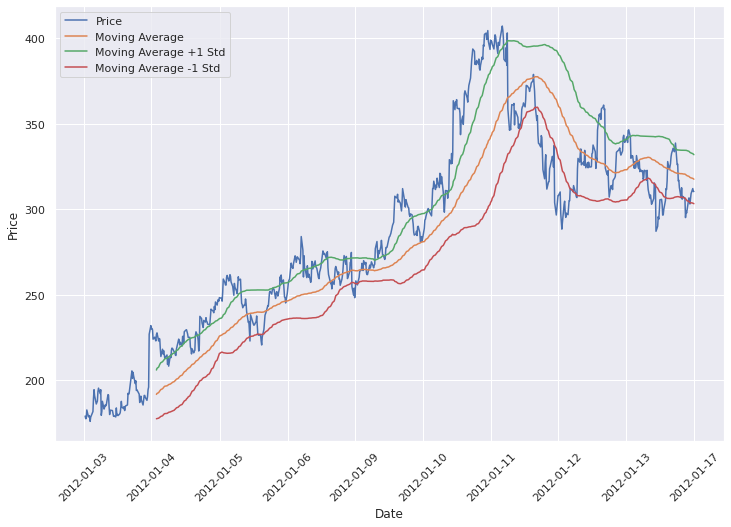

In [93]:
# Plot original data
_, ax5 = plt.subplots(figsize=(12,8))
ax5.plot(pricing)
ax5.set_xticklabels(pricing.index.date) # Label x-axis with dates
ax5.tick_params(axis = 'x', rotation = 45)

# Plot Bollinger bands
ax5.plot(mu)
ax5.plot(mu + std)
ax5.plot(mu - std);
ax5.set_ylabel('Price')
ax5.set_xlabel('Date')
ax5.legend(['Price', 'Moving Average', 'Moving Average +1 Std', 'Moving Average -1 Std'])

# **Conclusion**
Whenever we compute a parameter for a data set, we should also compute its volatility. Otherwise, we do not know whether or not we should expect new data points to be aligned with this parameter. A good way of computing volatility is dividing the data into subsets and estimating the parameter from each one, then finding the variability among the results. There may still be outside factors which are introduced after our sample period and which we cannot predict. However, the instability analysis and testing for standard error is still very useful for telling us how much we should distrust our estimates.
